In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
from scipy import optimize
from numpy import e
from numpy import cos
from numpy import sin
from numpy import diag
from numpy import sqrt
from numpy import pi


In [10]:
f_kHz = [ 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50] 
A = [ 1.11027, 1.16451, 1.22119, 1.29781, 1.3926, 1.52568, 1.68831, 1.9349, 2.20408, 2.7204, 3.20359, 3.5034, 3.31507, 2.85174, 2.3168, 1.86024, 1.55604, 1.27545, 1.08582, 0.940351, 0.826307, 0.738636, 0.649452, 0.583082, 0.529674, 0.487591, 0.454015, 0.413199, 0.382768, 0.354342, 0.336111, 0.321038, 0.290984, 0.274084, 0.25572, 0.240915, 0.230975, 0.213245, 0.211842, 0.197368, 0.189474, 0.180157, 0.165796, 0.165796, 0.156736, 0.148964] 
sA = [ 0.0237977, 0.0249608, 0.0261773, 0.027824, 0.0298659, 0.0327424, 0.0362706, 0.0416532, 0.0475935, 0.0591858, 0.0703241, 0.0775937, 0.0734912, 0.062881, 0.0507147, 0.0405109, 0.03381, 0.0276759, 0.0235611, 0.0204134, 0.0179654, 0.0160845, 0.0141805, 0.0127632, 0.0116354, 0.0107486, 0.0100542, 0.0091999, 0.00856393, 0.00797838, 0.00760216, 0.00728351, 0.00668288, 0.00634177, 0.00597324, 0.00568575, 0.0054855, 0.00513863, 0.00510449, 0.00483295, 0.00468678, 0.00450627, 0.00424776, 0.00424776, 0.00407734, 0.00394241] 

In [11]:

def fitfunc(x,B,R,L,C):
    w0=1E-3/(sqrt(L*C)*2*pi)
    Q=sqrt(L/C)/R
    return B/sqrt((1-x**2/w0**2)**2+x**2/(Q**2*w0**2))

p_init = [1 ,28,0.00084,104.5E-9] # valori iniziali 

p_best, pcov = optimize.curve_fit(
    fitfunc, f_kHz, A,          # assegno funzione di fit, ascisse e ordinate
    sigma=sA,                     # assegno gli errori sulle ordinate
    p0=p_init, bounds=(0, +np.inf) # imposto i valori iniziali dei parametri e
)      # intervalli ammessi [0, +∞)


---------------------------
Best fit values without errors
---------------------------
B = 1.0800623375462122  +-  0.011505539085234611
R = 30.186225486262448  +-  2.2745052512258113 Ohm
L = 0.0008655734608577519  +-  4.635848440631321e-05 H
C = 1.0161110406957176e-07  +-  6.670401224826879e-09 F
---------------------------


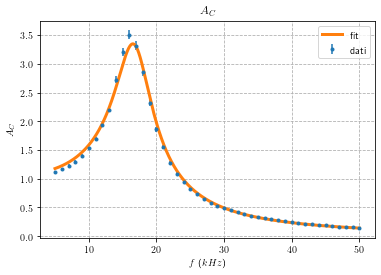

In [12]:
print("---------------------------")
print("Best fit values without errors")
print("---------------------------")
print("B =", p_best[0]," +- ",sqrt(diag(pcov)[0]))
print("R =", p_best[1]," +- ",sqrt(diag(pcov)[1]), "Ohm")
print("L =", p_best[2]," +- ",sqrt(diag(pcov)[2]), "H")
print("C =", p_best[3]," +- ",sqrt(diag(pcov)[3]),"F")
print("---------------------------")
fig=plt.figure()
plt.grid(linestyle='--')
plt.rc('text', usetex=True)
plt.errorbar(f_kHz, A, yerr=sA, fmt='.', label='dati')
_pts = np.linspace(f_kHz[0], f_kHz[-1],100000)
plt.plot(_pts, fitfunc(_pts, *p_best), label="fit",linewidth=3.0)
plt.title("$A_C $")
plt.xlabel("$f$ ($ kHz$)")
plt.ylabel("$A_C$")
plt.legend();
#fig.savefig('fitnosigma_rlr.pdf')

In [17]:
res = []
chisqv=0
sigmasq=0
for i in range (0,len(A)):
    res.insert(i,A[i]-fitfunc(f_kHz[i], *p_best))
    sigmasq+=(res[i])**2
    chisqv+=(res[i]/sA[i])**2
sigma_A=np.full(len(A),sqrt(sigmasq/(len(A)-3)))
print(chisqv)

170.62192458847562


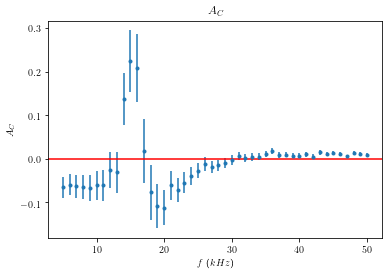

In [18]:
plt.figure(1)
plt.errorbar(f_kHz, res, yerr=sA, fmt='.')
plt.axhline(0, color='r')
plt.title("$A_C $")
plt.xlabel("$f$ ($ kHz$)")
plt.ylabel("$A_C$")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
def fitfuncplot(x,L,C):
    B=p_best[0]
    R=p_best[1]
    w0=1E-3/(sqrt(L*C)*2*pi)
    Q=sqrt(L/C)/R
    return B/sqrt((1-x**2/w0**2)**2+x**2/(Q**2*w0**2))
def chisquared(L,C):
    chisq=0
    for i in range (0,len(A)):
        chisq+=((A[i]-fitfuncplot(f_kHz[i],L,C))/sA[i])**2
    return chisq
fig=plt.figure()
y=np.linspace(90E-9,110E-9,10)
x=np.linspace(0.84E-3,0.93E-3,10)
#y=np.linspace(52,56,10)
z = np.array([chisquared(i,j) for j in y for i in x])
X, Y = np.meshgrid(x, y)
Z = z.reshape(10, 10)
plt.contourf(X, Y, Z,50,vmin=0,vmax=1500,cmap='nipy_spectral')
fig.suptitle(' $\chi ^2 (L,C)$ ')
plt.xlabel('$L$ $(H)$')
#plt.ylabel('$R$ ($\Omega$)')
plt.ylabel('$C$ $(F)$')
plt.colorbar()
plt.axvline(p_best[2], color='g')
plt.axhline(p_best[3], color='g')
plt.axvline(p_best[2]+sqrt(diag(pcov)[2]),color='g',linestyle='--')
plt.axvline(p_best[2]-sqrt(diag(pcov)[2]),color='g',linestyle='--')
plt.axhline(p_best[3]+sqrt(diag(pcov)[3]),color='g',linestyle='--')
plt.axhline(p_best[3]-sqrt(diag(pcov)[3]),color='g',linestyle='--')
#fig.savefig('chisqLCrlr.pdf')